## **ЛАБОРАТОРНАЯ РАБОТА 2**

## **1. Установка библиотеки vk**

In [11]:
#!pip install vk_api

     -------------------------------------- 48.6/48.6 kB 816.0 kB/s eta 0:00:00


In [1]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
import vk_api
import vk
import json
from pandas.io.json import json_normalize
%matplotlib inline

## **2. Подключение по токену**

### **2.1. Создание приложения в разделе "Разработчикам" на сайте vk.com и получение ID приложения**

### **2.2. Получение разрешений**

### **2.3. Получение токена**

### **2.4. Запуск сессии**

In [2]:
token = 'f0cab6f4f0cab6f4f0cab6f419f3deb7f8ff0caf0cab6f49497ae08d83c8dc93f4816bb'
version = 5.131
session = vk_api.VkApi(token=token)
api = session.get_api()

## **3. Выгрузка друзей**

In [5]:
#id = 177983170 #69 друзей
id = 10806932 #762 друга

In [133]:
def get_friends_list(id) -> list:
    try:
        response = session.method("friends.get", {"user_id": id})
    except vk_api.exceptions.ApiError:
        print("ERROR: Invalid authorization token or user id")
        return
    else:
        return response['items']

In [134]:
friends_list = get_friends_list(id)
print(f"Количество друзей у пользователя с ID:{id}: ",len(friends_list))

Количество друзей у пользователя с ID:10806932:  762


In [135]:
friends_ids_list = friends_list
fields_name = [
               'first_name', 'last_name', 'id', 'sex', 'bdate',
               'country', 'home_town', 'has_mobile', 'followers_count',
               'schools', 'universities', 'city',
               'can_post', 'has_photo', 'counters'
              ]

In [136]:
users = api.users.get(user_ids=friends_ids_list, fields=fields_name)
users[0]

{'id': 21968,
 'bdate': '11.11.1987',
 'city': {'id': 1, 'title': 'Moscow'},
 'country': {'id': 1, 'title': 'Russia'},
 'has_photo': 1,
 'has_mobile': 1,
 'can_post': 1,
 'followers_count': 779,
 'home_town': 'Москва',
 'universities': [{'chair': 2129,
   'chair_name': 'Микроэлектроники (№27)',
   'city': 1,
   'country': 1,
   'education_form': 'Full-time',
   'education_form_id': 1,
   'education_status': 'Postgraduate Student',
   'education_status_id': 8,
   'faculty': 1170,
   'faculty_name': 'Факультет автоматики и электроники (А)',
   'graduation': 2010,
   'id': 269,
   'name': 'НИЯУ МИФИ'},
  {'chair': 2131,
   'chair_name': ' Финансовый институт (Институт современного бизнеса)',
   'city': 1,
   'country': 1,
   'education_form': 'Part-time',
   'education_form_id': 2,
   'education_status': "Alumnus (Master's)",
   'education_status_id': 7,
   'faculty': 1171,
   'faculty_name': 'Факультет управления и экономики высоких технологий (У)',
   'graduation': 2010,
   'id': 269,
 

In [137]:
df = pd.json_normalize(users)
schools = pd.json_normalize(pd.json_normalize(df['schools'])[0]).add_prefix("school_")
schools = schools['school_name']
universities = pd.json_normalize(pd.json_normalize(df['universities'])[0]).add_prefix("university_")
universities = universities['university_name']
df = df.drop(columns=['schools', 'universities', 'deactivated'])
df = pd.concat([df,schools,universities], axis=1)
df

,id,bdate,has_photo,has_mobile,can_post,followers_count,home_town,sex,first_name,last_name,can_access_closed,is_closed,city.id,city.title,country.id,country.title,school_name,university_name
0,21968,11.11.1987,1,1.0,1,779.0,Москва,2,Zhenya,Narushevich,True,False,1.0,Moscow,1.0,Russia,NaN,НИЯУ МИФИ
1,39628,14.1.1987,1,1.0,0,11469.0,Санкт-Петербург,2,Petr,Kazansky,True,False,2.0,Saint Petersburg,1.0,Russia,Школа №87,СПбГУ
2,162384,23.3.1982,1,1.0,0,NaN,NaN,2,Alexey,Bezryadin,False,True,2.0,Saint Petersburg,1.0,Russia,NaN,NaN
3,185252,21.5.1988,1,1.0,0,457.0,NaN,2,Alexander,Filippov,True,False,1.0,Moscow,1.0,Russia,NaN,NaN
4,261089,5.3.1981,1,1.0,0,324.0,NaN,1,Ekaterina,Kononova,True,False,1.0,Moscow,1.0,Russia,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,733617012,7.9.2007,1,1.0,1,2370.0,,1,Agata,Dmitrieva,True,False,60.0,Kazan,1.0,Russia,Экспериментальная школа-лицей № 1 КГУ,NaN
758,735101576,17.6.2008,1,1.0,1,1965.0,Москва,2,Step,Back-Shop,True,False,1.0,Moscow,1.0,Russia,NaN,NaN
759,753784503,3.11.1988,1,1.0,0,11.0,,2,Mir,Shinobi,True,False,NaN,NaN,NaN,NaN,NaN,NaN
760,755895596,4.5.2000,1,1.0,0,13.0,Москва,2,Mikhail,Ignatyev,True,False,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df.columns

Index(['id', 'bdate', 'has_photo', 'has_mobile', 'can_post', 'followers_count',
       'home_town', 'sex', 'first_name', 'last_name', 'can_access_closed',
       'is_closed', 'city.id', 'city.title', 'country.id', 'country.title',
       'school_name', 'university_name'],
      dtype='object')

## **4. Работа с признаками**

In [139]:
import seaborn as sns

### **4.1. Работа с признаком sex**

<AxesSubplot: xlabel='sex', ylabel='count'>

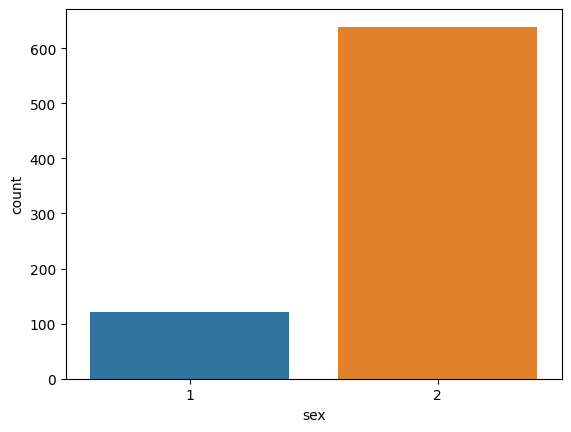

In [140]:
df = df[df['sex']!=0]
sns.countplot(data=df, x='sex')

### **4.2. Работа с признаком city.title**

In [141]:
df['city.title'].isna().sum()

147

In [142]:
from deep_translator import GoogleTranslator
translated = GoogleTranslator(source='en', target='ru')

In [143]:
df['city.title'] = df['city.title'].fillna("Другой")
df['city.title'] = df['city.title'].apply(translated.translate)

C:\Users\denis\AppData\Local\Temp\ipykernel_27312\4133503100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city.title'] = df['city.title'].fillna("Другой")
C:\Users\denis\AppData\Local\Temp\ipykernel_27312\4133503100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city.title'] = df['city.title'].apply(translated.translate)


### **4.2. Работа с признаком home_town**

In [144]:
df.columns

Index(['id', 'bdate', 'has_photo', 'has_mobile', 'can_post', 'followers_count',
       'home_town', 'sex', 'first_name', 'last_name', 'can_access_closed',
       'is_closed', 'city.id', 'city.title', 'country.id', 'country.title',
       'school_name', 'university_name'],
      dtype='object')

In [145]:
cities = df[['city.title', 'city.id']].drop_duplicates().dropna()
cities.index = cities['city.id']
cities = cities.drop(columns=['city.id'])
cities

,city.title
city.id,
1.0,Москва
2.0,Санкт-Петербург
60.0,Казань
10.0,Волгоград
20735.0,Марбелья
...,...
109.0,Пенза
1960291.0,Ванкувер
20691.0,Тосно


In [146]:
for i in df.index:
    if pd.isna(df['home_town'].loc[i]):
        if not pd.isna(df['city.title'].loc[i]):
            df['home_town'].loc[i] = df['city.title'].loc[i]
        elif not pd.isna(df['school_city'].loc[i]):
            df['home_town'].loc[i] = cities['city.title'].loc[df['school_city'].loc[i]]
        elif not pd.isna(df['university_city'].loc[i]):
            df['home_town'].loc[i] = cities['city.title'].loc[df['university_city'].loc[i]]
        else:
            df['home_town'].loc[i] = "Другой"
        

C:\Users\denis\AppData\Local\Temp\ipykernel_27312\3304758871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_town'].loc[i] = df['city.title'].loc[i]


In [147]:
df.home_town = df.home_town.replace("", "Другой")
df["home_town"].unique()

C:\Users\denis\AppData\Local\Temp\ipykernel_27312\3586466368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.home_town = df.home_town.replace("", "Другой")


array(['Москва', 'Санкт-Петербург', 'Другой', 'Волжский', 'москва',
       'Казань', 'Волгоград', 'Марбелья', 'Moscow', 'Балашиха',
       'Ставрополь', 'Одинцово', 'Екатеринбург', 'Томск', 'Кемерово',
       'Пушкино Московской области', 'Пермь', 'Чебоксары', 'Ржев',
       'Ленинград', 'Нижний Новгород', 'Самара', 'Лос-Анджелес', 'Липецк',
       'Кокберн Таун', 'Иркутск', 'Ханты-Мансийск', 'Иваново',
       'Краснодар', 'Ростов-на-Дону', 'Калуга', 'Курск', 'Ленинск',
       'Амстердам', 'Саратов', 'Кострома, Актюбинск, Санкт-Петербург',
       'Сочи', 'Уфа', 'Пенза', 'Рустави', 'Вязьма', 'Чунцин',
       'Город героев', 'Сталинград', '( Житомир)', 'Тюмень', 'Мардакерт',
       'Киквидзе', 'Севан', 'Туранчокс', 'Краснознаменск/Чернигов',
       'Коста Бланка', 'Рязань', 'Krasnoyarsk', 'Надым', 'казань',
       'Одинцово (деревня)', 'Учалы Челябинск Москва', 'Юрга',
       'Пущино (деревня)', 'Реутов', 'Барнаул', 'Nikolaev UK',
       'Анадырь, Москва', 'Ливны', 'Вантаа', 'Воронеж', '

#### **4.2.1. Чистка городов**

##### **4.2.1.2. Замена пустых значений и прочих**

In [148]:


for i in df.home_town:
    if 'moscow' in i.lower(): df.home_town.replace(i, 'Москва', inplace=True)
    elif 'самара' in i.lower(): df.home_town.replace(i, 'Самара', inplace=True)
    elif 'москва' in i.lower(): df.home_town.replace(i, 'Москва', inplace=True)
    elif 'пушкино московской области' in i.lower(): df.home_town.replace(i, 'Пушкино', inplace=True)
    elif 'город героев' in i.lower(): df.home_town.replace(i, 'Санкт-Петербург', inplace=True)
    elif '( житомир)' in i.lower(): df.home_town.replace(i, 'Житомир', inplace=True)
    elif 'краснознаменск/чернигов' in i.lower(): df.home_town.replace(i, 'Краснознаменск', inplace=True)
    elif 'krasnoyarsk' in i.lower(): df.home_town.replace(i, 'Красноярск', inplace=True)
    elif 'казань' in i.lower(): df.home_town.replace(i, 'Казань', inplace=True)
    elif 'одинцово (деревня)' in i.lower(): df.home_town.replace(i, 'Одинцово', inplace=True)
    elif 'учалы челябинск москва' in i.lower(): df.home_town.replace(i, 'Москва', inplace=True)
    elif 'пущино (деревня)' in i.lower(): df.home_town.replace(i, 'Пущино', inplace=True)
    elif 'nikolaev uk' in i.lower(): df.home_town.replace(i, 'Николаев', inplace=True)
    elif 'анадырь, москва' in i.lower(): df.home_town.replace(i, 'Москва', inplace=True)
    elif 'волгоград' in i.lower(): df.home_town.replace(i, 'Волгоград', inplace=True)
    elif 'волгоград...( москва)' in i.lower(): df.home_town.replace(i, 'Москва', inplace=True)
    elif 'волгоград' in i.lower(): df.home_town.replace(i, 'Волгоград', inplace=True)
    elif 'стаханов' in i.lower(): df.home_town.replace(i, 'Стаханов', inplace=True)
    elif 'майгоп' in i.lower(): df.home_town.replace(i, 'Майгоп', inplace=True)
    elif 'miami' in i.lower(): df.home_town.replace(i, 'Майами', inplace=True)
    elif 'san francisco' in i.lower(): df.home_town.replace(i, 'Сан Франциско', inplace=True)
    elif 'шлиссельбург' in i.lower(): df.home_town.replace(i, 'Шлиссельбург', inplace=True)
    elif 'электросталь дом,москва работа' in i.lower(): df.home_town.replace(i, 'Москва', inplace=True)
    elif ' sankt-petersburg (volgograd)' in i.lower(): df.home_town.replace(i, 'Санкт-Петербург', inplace=True)
    elif 'запорожье / бердянск / киев ...' in i.lower(): df.home_town.replace(i, 'Киев', inplace=True)
    elif 'тамбов-москва' in i.lower(): df.home_town.replace(i, 'Москва', inplace=True)
    elif 'сочи - краснодар' in i.lower(): df.home_town.replace(i, 'Сочи', inplace=True)
    elif 'volzhsky' in i.lower(): df.home_town.replace(i, 'Волжский', inplace=True)
    elif 'питер' in i.lower(): df.home_town.replace(i, 'Санкт-Петербург', inplace=True)
    elif 'самара - москва - питер' in i.lower(): df.home_town.replace(i, 'Москва', inplace=True)
    elif 'нск' in i.lower(): df.home_town.replace(i, 'Новосибирск', inplace=True)
    elif 'miami' in i.lower(): df.home_town.replace(i, 'Майами', inplace=True)
    elif 'ржев' in i.lower(): df.home_town.replace(i, 'Ржев', inplace=True)


df.home_town.unique()

C:\Users\denis\AppData\Local\Temp\ipykernel_27312\249145644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif 'москва' in i.lower(): df.home_town.replace(i, 'Москва', inplace=True)
C:\Users\denis\AppData\Local\Temp\ipykernel_27312\249145644.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif 'казань' in i.lower(): df.home_town.replace(i, 'Казань', inplace=True)
C:\Users\denis\AppData\Local\Temp\ipykernel_27312\249145644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

array(['Москва', 'Санкт-Петербург', 'Другой', 'Волжский', 'Казань',
       'Волгоград', 'Марбелья', 'Балашиха', 'Ставрополь', 'Одинцово',
       'Екатеринбург', 'Томск', 'Кемерово', 'Пушкино', 'Пермь',
       'Чебоксары', 'Ржев', 'Ленинград', 'Нижний Новгород', 'Самара',
       'Лос-Анджелес', 'Липецк', 'Кокберн Таун', 'Иркутск',
       'Ханты-Мансийск', 'Иваново', 'Краснодар', 'Ростов-на-Дону',
       'Калуга', 'Курск', 'Новосибирск', 'Амстердам', 'Саратов', 'Сочи',
       'Уфа', 'Пенза', 'Рустави', 'Вязьма', 'Чунцин', 'Сталинград',
       'Житомир', 'Тюмень', 'Мардакерт', 'Киквидзе', 'Севан', 'Туранчокс',
       'Краснознаменск', 'Коста Бланка', 'Рязань', 'Красноярск', 'Надым',
       'Юрга', 'Пущино', 'Реутов', 'Барнаул', 'Николаев', 'Ливны',
       'Вантаа', 'Воронеж', 'Тула', 'Астрахань', 'Горький', 'Фролово',
       'Винница', 'Донецк', 'Полевской', 'Тобольск', 'Киров', 'Стаханов',
       'Речица', 'Мытищи', 'Старый Оскол', 'Хабаровск', 'Суровикино',
       'Дубна', 'Лондон', 'Ма

### **4.3. Работа с признаком has_mobile**

In [149]:
df['has_mobile'].isna().sum()

25

<AxesSubplot: xlabel='has_mobile', ylabel='count'>

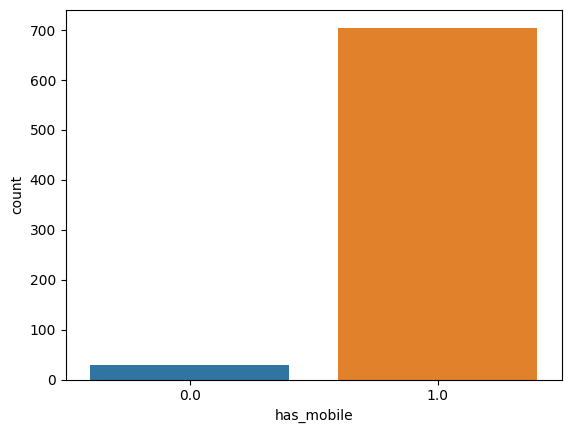

In [150]:
sns.countplot(data=df, x='has_mobile')

#### **4.3.1. Удаление признака has_mobile по причине наличия мобильного телефона у 24 из 762 друзей**

In [151]:
df = df.drop(columns=['has_mobile'])

### **4.4. Работа с признаком followers_count**

In [152]:
print("Количество друзей с неизвестными подписчиками: ", df['followers_count'].isna().sum())
df['followers_count'] = df['followers_count'].fillna(0)

Количество друзей с неизвестными подписчиками:  151


<AxesSubplot: ylabel='followers_count'>

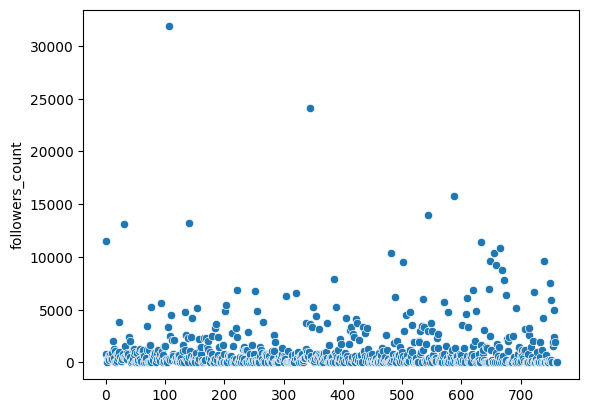

In [153]:
sns.scatterplot(data=df['followers_count'])

In [154]:
df = df.drop(df[df.followers_count > 10000].index)

### **4.5. Работа с признаком is_closed**

In [155]:
df['is_closed'].isna().sum()

0

<AxesSubplot: xlabel='is_closed', ylabel='count'>

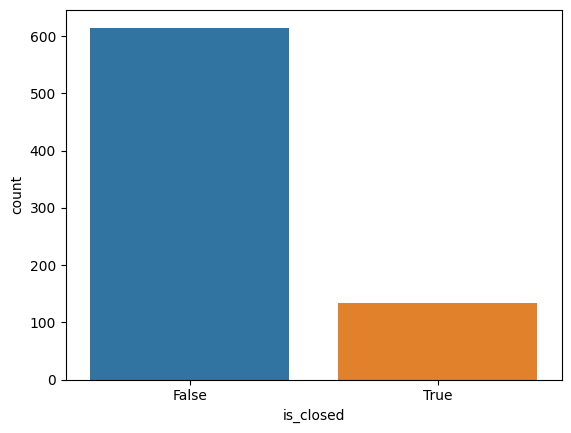

In [156]:
sns.countplot(data=df, x='is_closed')

### **4.6. Работа с признаком can_access_closed**

In [157]:
df['can_access_closed'].isna().sum()

0

<AxesSubplot: xlabel='can_access_closed', ylabel='count'>

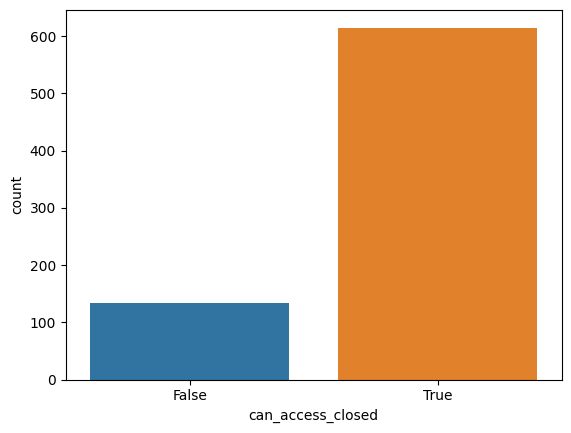

In [158]:
sns.countplot(data=df, x='can_access_closed')

### **4.11. Работа с признаком can_post**

In [159]:
print('Кол-во друзей с пустым значением публичности стены: ', df['can_post'].isna().sum())

Кол-во друзей с пустым значением публичности стены:  0


<AxesSubplot: xlabel='can_post', ylabel='count'>

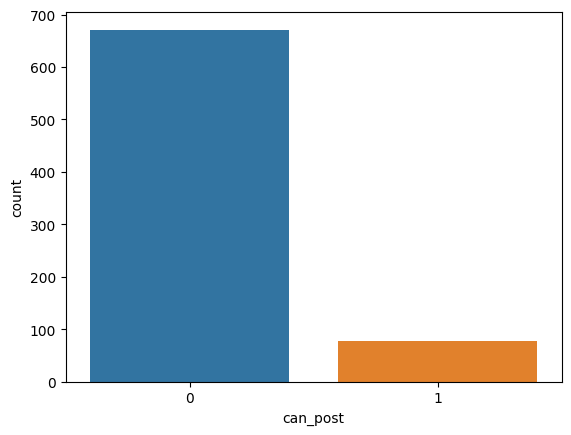

In [160]:
sns.countplot(data=df, x='can_post')

In [161]:
df = df.drop(columns=['can_post'])

### **4.17. Работа с признаком has_photo**

<AxesSubplot: ylabel='count'>

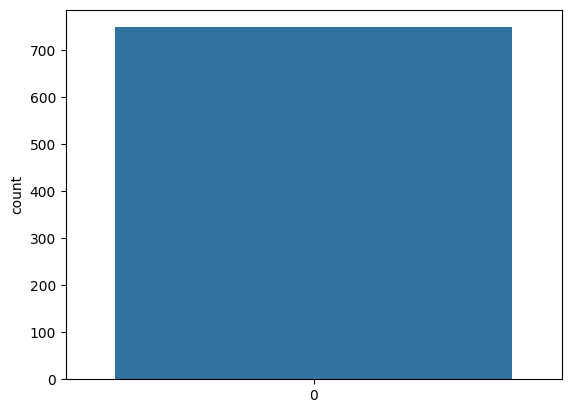

In [162]:

sns.countplot(df.has_photo)

In [163]:
df = df.drop(columns=['has_photo'])

#### **4.20.1. Удаление выбросов**

In [165]:
columns = ['followers_count']

In [166]:
for i in columns:
  Q3 = np.quantile(df[i], 0.85)
  Q1 = np.quantile(df[i], 0.25)
  TIQR = 3 * (Q3 - Q1)
  df = df.drop(df[df[i] > (Q3 + TIQR)].index)
  df = df.drop(df[df[i] < (Q1 - TIQR)].index)

In [167]:
df = df.reset_index()

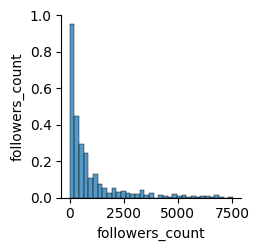

In [168]:
sns.pairplot(data=df[['followers_count']])

### **4.21. Работа с признаком bdate**

In [170]:
def date_2_age(x):
    if not pd.isna(x):
        if len(x.split(".")) == 3:
            x = 2023-int(x.split(".")[2])
            return x

In [171]:
df['bdate'] = df['bdate'].apply(date_2_age)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              742 non-null    int64  
 1   id                 742 non-null    int64  
 2   bdate              340 non-null    float64
 3   followers_count    742 non-null    float64
 4   home_town          742 non-null    object 
 5   sex                742 non-null    int64  
 6   first_name         742 non-null    object 
 7   last_name          742 non-null    object 
 8   can_access_closed  742 non-null    bool   
 9   is_closed          742 non-null    bool   
 10  city.id            600 non-null    float64
 11  city.title         742 non-null    object 
 12  country.id         633 non-null    float64
 13  country.title      633 non-null    object 
 14  school_name        152 non-null    object 
 15  university_name    159 non-null    object 
dtypes: bool(2), float64(4), in

In [173]:
df = df.drop(columns=['bdate'])

### **4.22. Работа с признаком country**

In [174]:
df['country.title'].value_counts()

Russia                      601
Ukraine                      12
USA                           5
Belarus                       2
Armenia                       2
Spain                         1
Turks and Caicos Islands      1
Netherlands                   1
China                         1
Finland                       1
Turkey                        1
North Korea                   1
United Kingdom                1
Moldova                       1
Kazakhstan                    1
Canada                        1
Name: country.title, dtype: int64

<AxesSubplot: xlabel='country.title', ylabel='count'>

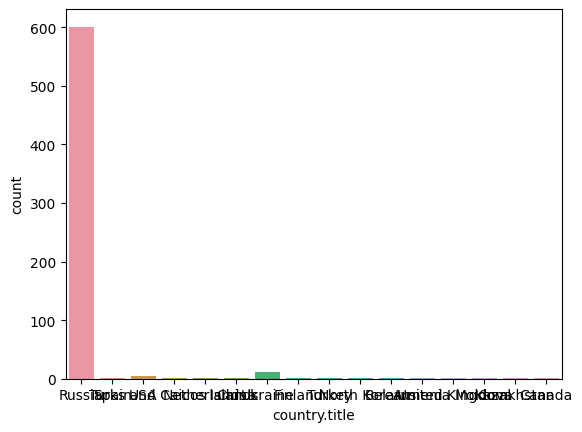

In [175]:
sns.countplot(data=df, x='country.title')

In [180]:
df = df.drop(columns=['city.id', 'country.id', 'school_name', 'university_name'])

In [183]:
df['country.title'] = df['country.title'].fillna("Russia")

In [208]:
df.can_access_closed = df.can_access_closed.replace(True, 1).replace(False, 0)
df.is_closed = df.is_closed.replace(True, 1).replace(False, 0)
df['followers_count'] = df['followers_count'].astype("int")
df['sex'] = df['sex'].astype("int")
df['can_access_closed'] = df['can_access_closed'].astype("int")
df['is_closed'] = df['is_closed'].astype("int")


In [209]:
df.dtypes

index                 int64
id                    int64
followers_count       int32
home_town            object
sex                   int32
first_name           object
last_name            object
can_access_closed     int32
is_closed             int32
city.title           object
country.title        object
dtype: object

### **5. Преобразование категориальных признаков в числовые**

In [210]:
from sklearn.preprocessing import *

df_le = df.copy(deep=True)
categorical_feature_mask = df_le.dtypes==object
categorical_cols = df_le.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
df_le[categorical_cols] = df_le[categorical_cols].apply(lambda col: le.fit_transform(col))
df_le = df_le[categorical_cols]
#df_le = df_le.reset_index()
#df_le = df_le.astype(float)
#del df_le['index']

In [211]:
df_le.head()

,home_town,first_name,last_name,city.title,country.title
0,51,227,382,55,9
1,72,10,51,73,9
2,51,8,142,55,9
3,51,68,256,55,9
4,72,129,514,73,9


### **6. Создание набора данных числовых признаков**

In [212]:
digit_feature_mask = df.dtypes==int
digit_cols = df.columns[digit_feature_mask].tolist()

In [213]:
digit_cols

['followers_count', 'sex', 'can_access_closed', 'is_closed']

In [218]:
df_digit = df[digit_cols]
df_digit

,followers_count,sex,can_access_closed,is_closed
0,779,2,1,0
1,0,2,0,1
2,457,2,1,0
3,324,1,1,0
4,729,2,1,0
...,...,...,...,...
737,2370,1,1,0
738,1965,2,1,0
739,11,2,1,0
740,13,2,1,0


### **7. Тепловая карта числовых признаков**

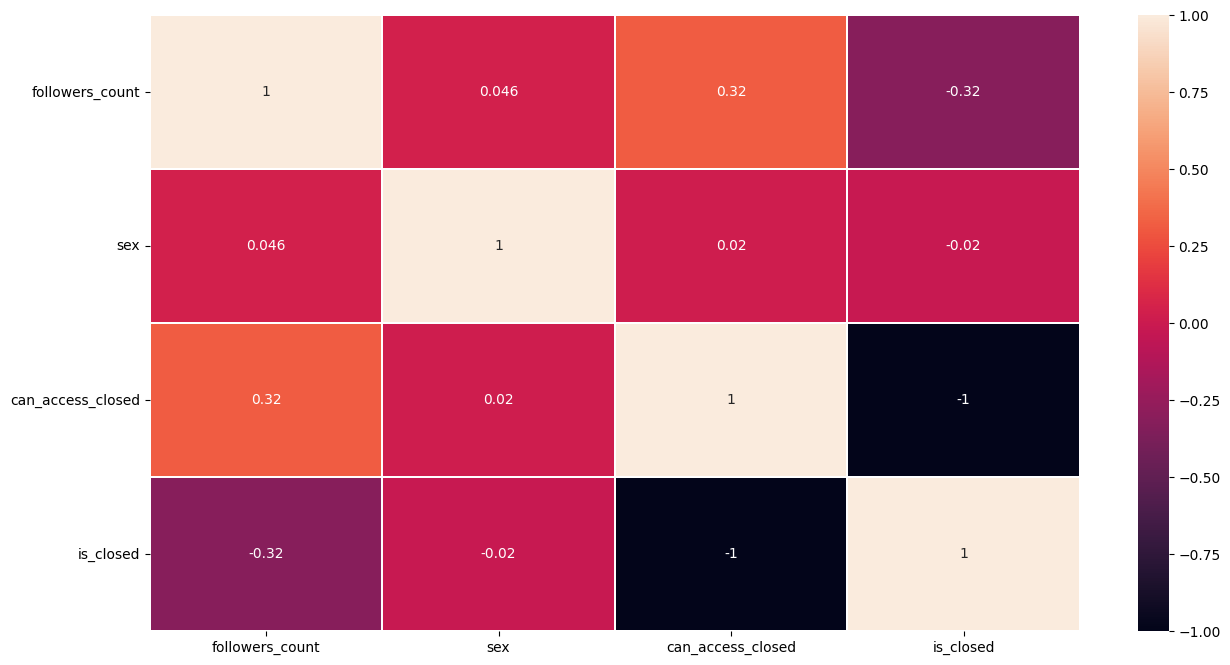

In [219]:
sns.heatmap(df_digit.corr(), annot=True, linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(15,8)

### **8. Создание готового набора данных для проведения кластеризации**

In [220]:
data = pd.concat([df_digit, df_le], axis=1)

In [224]:
data.head()

,followers_count,sex,can_access_closed,is_closed,home_town,first_name,last_name,city.title,country.title
0,779,2,1,0,51,227,382,55,9
1,0,2,0,1,72,10,51,73,9
2,457,2,1,0,51,8,142,55,9
3,324,1,1,0,51,68,256,55,9
4,729,2,1,0,72,129,514,73,9


In [225]:
data.columns

Index(['followers_count', 'sex', 'can_access_closed', 'is_closed', 'home_town',
       'first_name', 'last_name', 'city.title', 'country.title'],
      dtype='object')

### **9. Применение методов Scaler к набору данных**

In [226]:
df_norm = data.copy(deep=True)
df_minmax = data.copy(deep=True)
df_stand = data.copy(deep=True)
df_maxabs = data.copy(deep=True)
df_robust = data.copy(deep=True)
df_powert = data.copy(deep=True)

norm = Normalizer().fit(df_norm)
minmax = MinMaxScaler().fit(df_minmax)
stand = StandardScaler().fit(df_stand)
maxabs = MaxAbsScaler().fit(df_maxabs)
robust = RobustScaler().fit(df_robust)
powert = PowerTransformer().fit(df_powert)

df_to_norm = norm.transform(df_norm)
df_to_minmax = minmax.transform(df_minmax)
df_to_stand = stand.transform(df_stand)
df_to_maxabs = maxabs.transform(df_maxabs)
df_to_robust = robust.transform(df_robust)
df_to_powert = powert.transform(df_powert)

df_norm = pd.DataFrame(df_to_norm)
df_minmax = pd.DataFrame(df_to_minmax)
df_stand = pd.DataFrame(df_to_stand)
df_maxabs = pd.DataFrame(df_to_maxabs)
df_robust = pd.DataFrame(df_to_robust)
df_powert = pd.DataFrame(df_to_powert)

df_notscaled = data.copy(deep=True)

In [227]:
df_norm.name = 'Normalizer'
df_minmax.name = 'MinMaxScaler'
df_stand.name = 'StandardScaler'
df_maxabs.name = 'MaxAbsScaler'
df_robust.name = 'RobustScaler'
df_powert.name = 'PowerTransformer'
df_notscaled.name = 'Not Scaled'

### **10. Создание конвейера для подбора лучшей модели**

In [228]:
from sklearn.cluster import *
from sklearn.metrics import *

In [229]:
float_frames = [df_norm, df_minmax, df_stand, df_maxabs, df_robust, df_powert, df_notscaled]
methods = [KMeans(), MiniBatchKMeans(), 
           AffinityPropagation(), 
           AgglomerativeClustering(), 
           MeanShift()]

metrics = pd.DataFrame(columns=['Method', 'Scaler', 'Silhouette Score', 'Davies Bouldin Score', 'Inertia'])

In [230]:
r = 5

two_methods = ['KMeans', 'MiniBatchKMeans']

for j in float_frames:
  for l in methods:
    est = l.fit(j)

    method_name = str(est)[:str(est).find('(')]

    to_df = pd.DataFrame(est.labels_)
    to_df.columns = ['labels']
    n_labels = len(to_df.labels.unique())

    if method_name in two_methods:
      if n_labels > 1:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': round(silhouette_score(j, est.labels_), r),
                                'Davies Bouldin Score': round(davies_bouldin_score(j, est.labels_), r),
                                'Inertia': round(est.inertia_, r)
                                }, ignore_index=True)
      else:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': '-',
                                'Davies Bouldin Score': '-',
                                'Inertia': round(est.inertia_, r)
                                }, ignore_index=True)
    else:
      if n_labels > 1:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': round(silhouette_score(j, est.labels_), r),
                                'Davies Bouldin Score': round(davies_bouldin_score(j, est.labels_), r),
                                'Inertia': '-'
                                }, ignore_index=True)
      else:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': '-',
                                'Davies Bouldin Score': '-',
                                'Inertia': '-'
                                }, ignore_index=True)

C:\Users\denis\AppData\Local\Temp\ipykernel_27312\3215500310.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
C:\Users\denis\AppData\Local\Temp\ipykernel_27312\3215500310.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
C:\Users\denis\AppData\Local\Temp\ipykernel_27312\3215500310.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
C:\Users\denis\AppData\Local\Temp\ipykernel_27312\3215500310.py:30: FutureWarning: The frame.append method is deprecated and will be rem

In [231]:
metrics[(metrics['Silhouette Score'] != '-') & (metrics['Davies Bouldin Score'] != '-')].sort_values(by='Silhouette Score', ascending=False)

,Method,Scaler,Silhouette Score,Davies Bouldin Score,Inertia
33,AgglomerativeClustering,Not Scaled,0.75683,0.49412,-
34,MeanShift,Not Scaled,0.72855,0.43979,-
3,AgglomerativeClustering,Normalizer,0.53708,0.69640,-
4,MeanShift,Normalizer,0.53116,0.98212,-
18,AgglomerativeClustering,MaxAbsScaler,0.52486,0.76243,-
19,MeanShift,MaxAbsScaler,0.52486,0.76243,-
8,AgglomerativeClustering,MinMaxScaler,0.48444,0.86572,-
23,AgglomerativeClustering,RobustScaler,0.42603,0.99200,-
24,MeanShift,RobustScaler,0.42278,0.56546,-
0,KMeans,Normalizer,0.42003,0.87496,22.36389


### **Лучшая комбинация AgglomerativeClustering + Not Scaled, но я воспользуюсь maxabs, потому что:**


In [232]:
ss_kmeans = []
bd_kmeans = []
ss_agg = []
bd_agg = []
ss_mb = []
bd_mb = []

x = df_maxabs

for k in range(2, 11):
  est = KMeans(n_clusters=k)
  est.fit(x)
  ss_kmeans.append(silhouette_score(x, est.labels_))
  bd_kmeans.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = AgglomerativeClustering(n_clusters=k)
  est.fit(x)
  ss_agg.append(silhouette_score(x, est.labels_))
  bd_agg.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = MiniBatchKMeans(n_clusters=k)
  est.fit(x)
  ss_mb.append(silhouette_score(x, est.labels_))
  bd_mb.append(davies_bouldin_score(x, est.labels_))

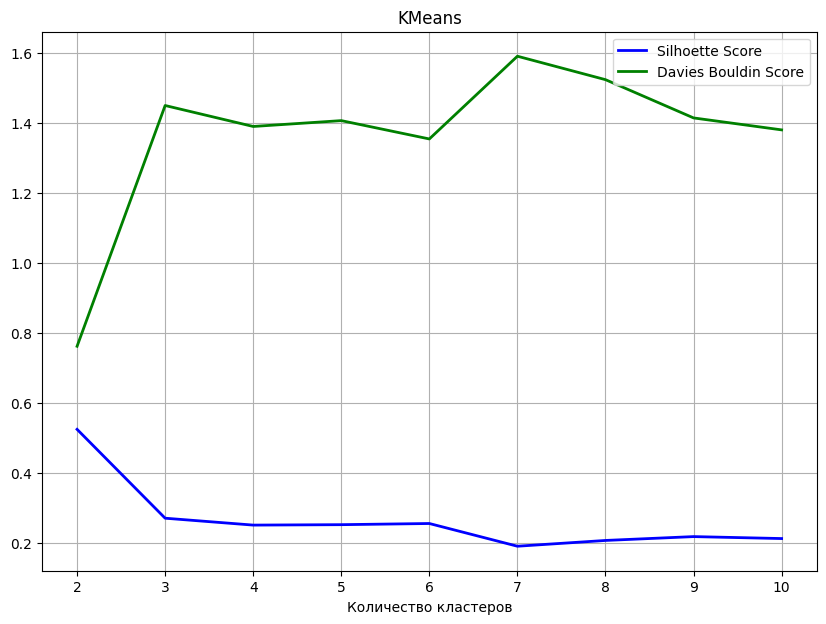

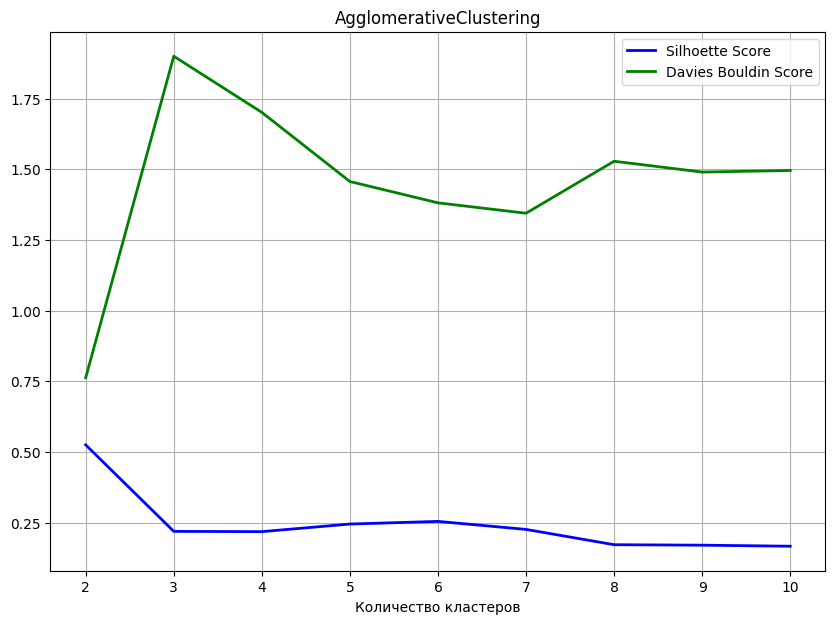

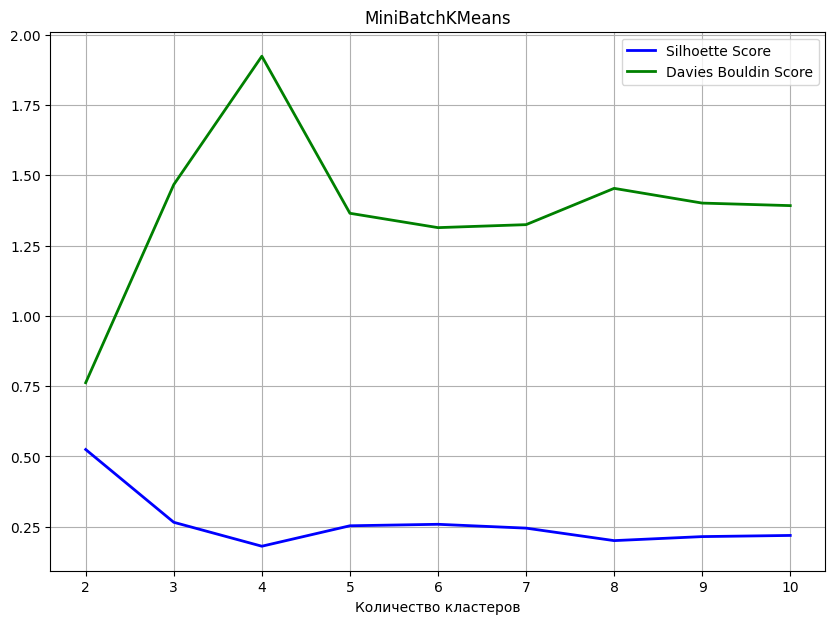

In [233]:
plt.figure(figsize=(10, 7))
plt.plot(ss_kmeans, linewidth=2, color='blue')
plt.plot(bd_kmeans, linewidth=2, color='green')
plt.title('KMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

points = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10']
plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_agg, linewidth=2, color='blue')
plt.plot(bd_agg, linewidth=2, color='green')
plt.title('AgglomerativeClustering')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_mb, linewidth=2, color='blue')
plt.plot(bd_mb, linewidth=2, color='green')
plt.title('MiniBatchKMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

In [234]:
x = df_maxabs
est = AgglomerativeClustering(n_clusters=8)
est.fit(x)

AgglomerativeClustering(n_clusters=8)

In [235]:
print('SS/DBS', 
      round(silhouette_score(x, est.labels_), 5),
      '/',
      round(davies_bouldin_score(x, est.labels_), 5))

SS/DBS 0.17169 / 1.52818


<AxesSubplot: xlabel='cluster', ylabel='count'>

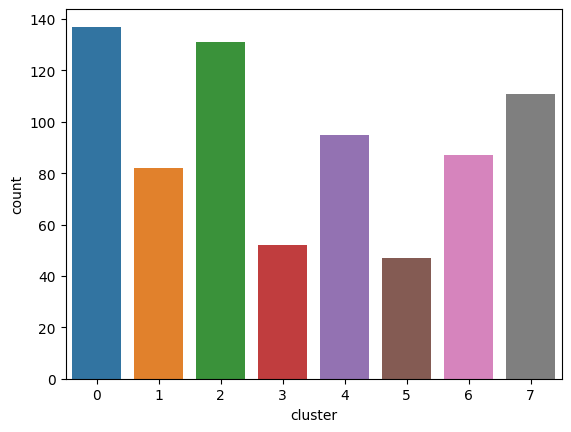

In [243]:
labels = pd.DataFrame(est.labels_)
labels.columns = ['cluster']
df_clusters = pd.concat([df, labels], axis=1)

sns.countplot(data=df_clusters, x='cluster')

c:\Users\denis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\denis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


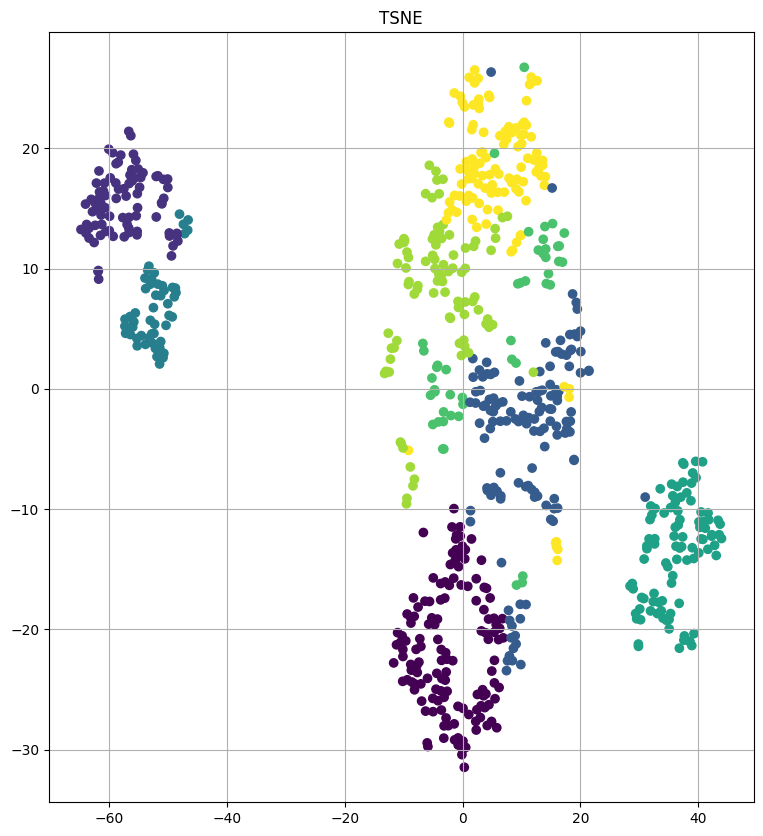

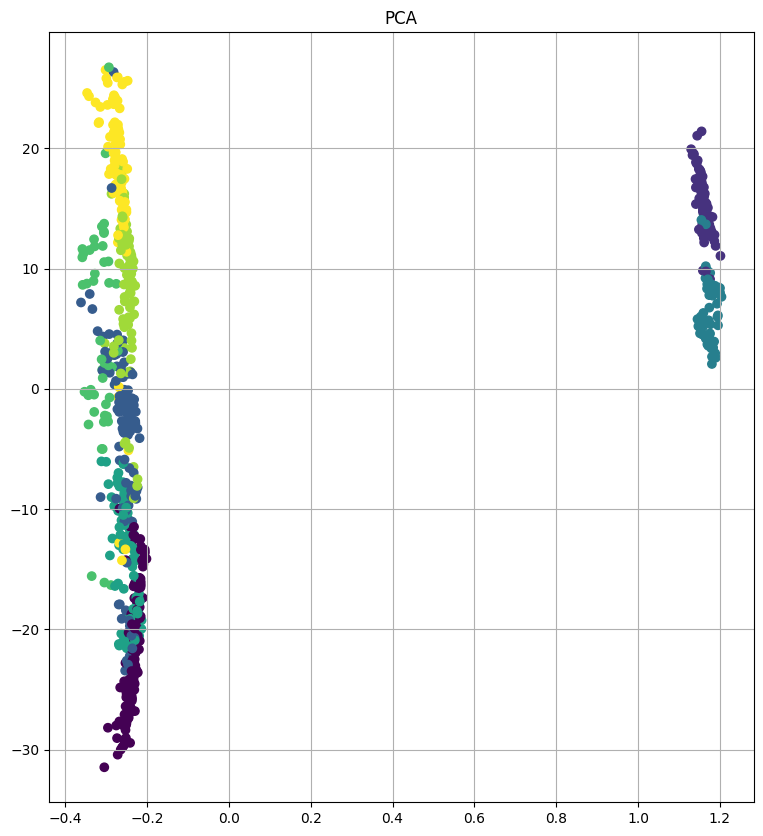

In [244]:
from sklearn.manifold import *
from sklearn.decomposition import PCA

x = df_maxabs

tsne = TSNE(n_components=2
            ,random_state=22
            ).fit_transform(x)

pca = PCA().fit_transform(x)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(tsne[:, 0], tsne[:, 1], c=est.labels_)
plt.title('TSNE')
plt.grid(True)

plt.figure(figsize=(20, 10))
plt.subplot(122)
plt.scatter(pca[:, 0], tsne[:, 1], c=est.labels_)
plt.title('PCA')
plt.grid(True)

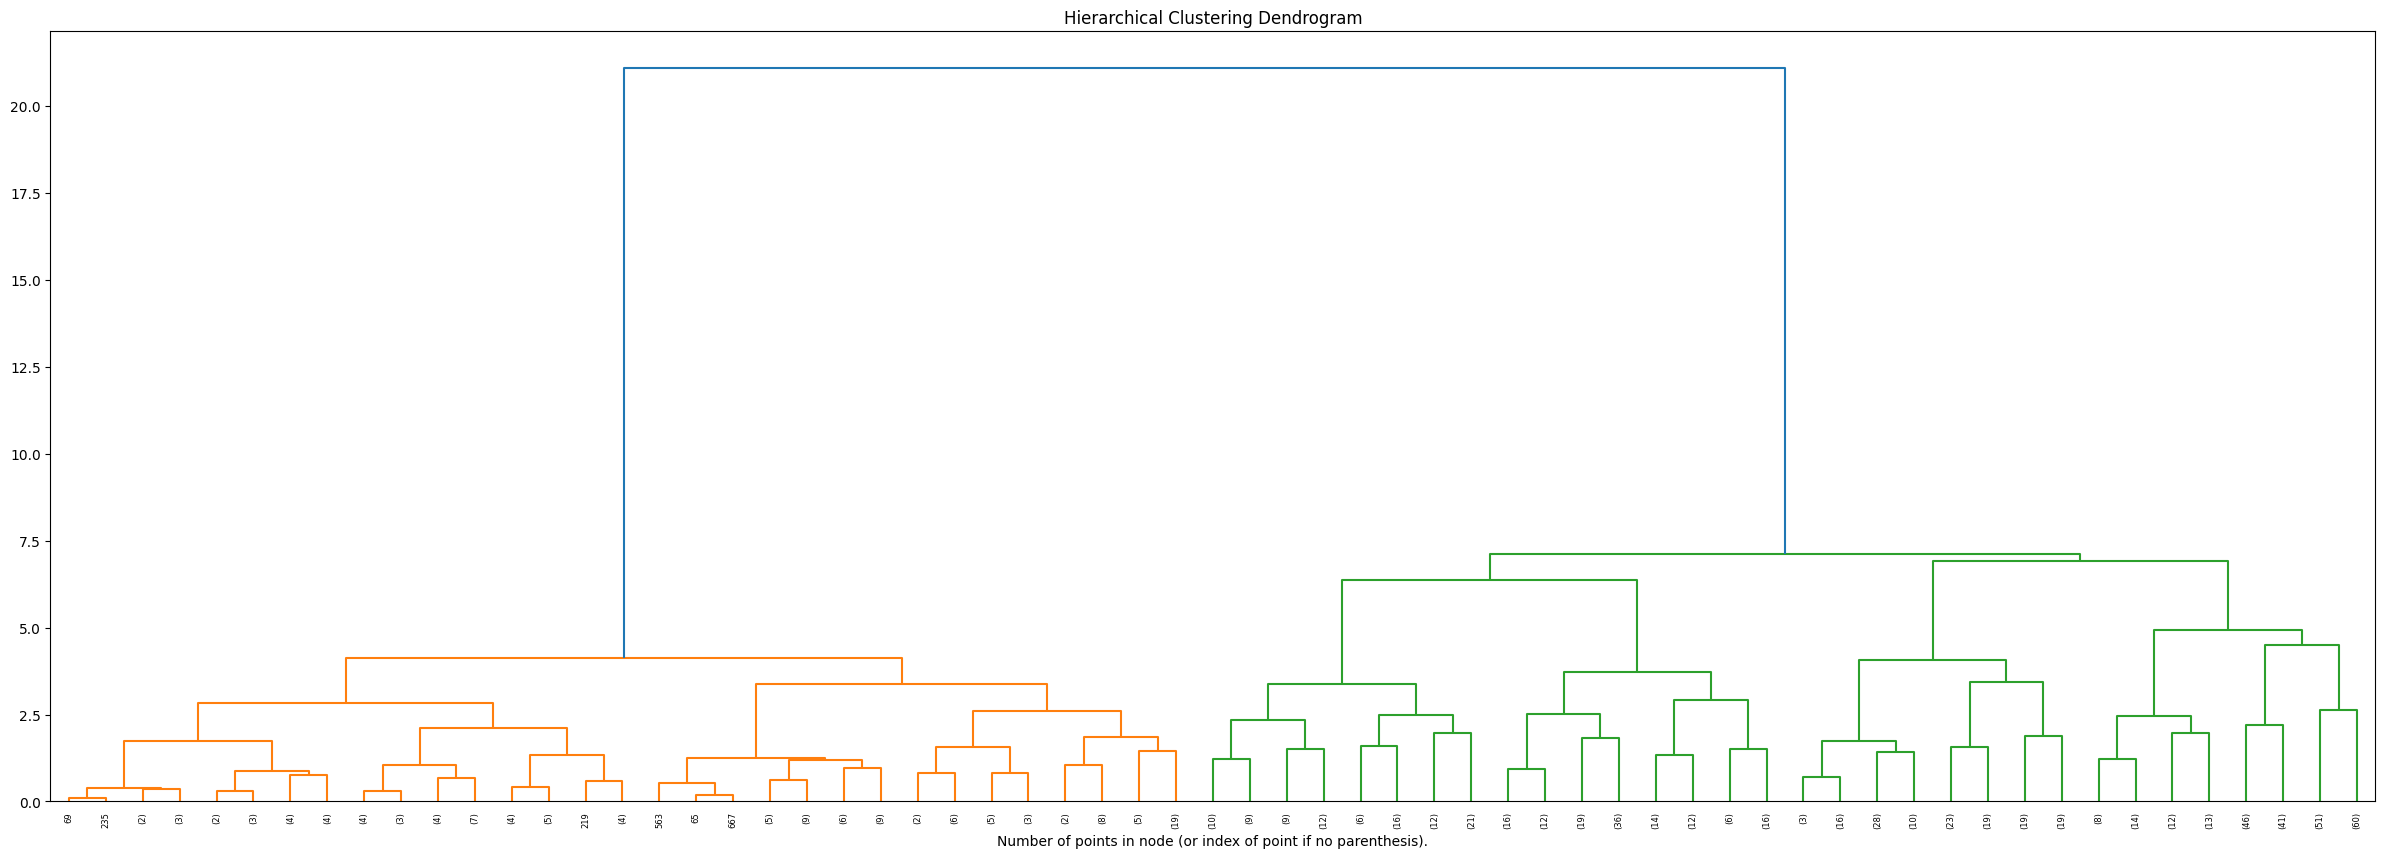

In [245]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_maxabs)
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()